<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/practice_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-01-09 02:47:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   148MB/s    in 1.1s    

2025-01-09 02:47:57 (148 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
import zipfile

zip_ref = zipfile.ZipFile("/content/10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir ="/content/10_food_classes_10_percent/test"

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (224,224)
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (224,224)
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
base = tf.keras.applications.ResNet50(include_top=False)
base.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
data_augment = tf.keras.Sequential([
    tf.keras.layers.Resizing(224,224),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomWidth(0.2)
])

In [8]:
inputs = tf.keras.layers.Input(shape = (224,224,3))
x= data_augment(inputs)
x = base(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation = "softmax")(x)

base_model = tf.keras.Model(inputs,outputs)

In [9]:
base_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics =['accuracy'])

In [10]:
chck_path = "model_chck.weights.h5"

chck = tf.keras.callbacks.ModelCheckpoint(chck_path,
                                          monitor ="val_accuracy",
                                          save_best_only =True,
                                          save_weights_only = True)

In [11]:
hist =base_model.fit(train_data,
               epochs = 5,
               validation_data = test_data,
               callbacks =[chck])

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.1527 - loss: 2.5582 - val_accuracy: 0.4316 - val_loss: 1.6505
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 758ms/step - accuracy: 0.4587 - loss: 1.5790 - val_accuracy: 0.5960 - val_loss: 1.1919
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 671ms/step - accuracy: 0.6309 - loss: 1.1673 - val_accuracy: 0.6288 - val_loss: 1.0857
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 649ms/step - accuracy: 0.6808 - loss: 0.9944 - val_accuracy: 0.6604 - val_loss: 0.9890
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 596ms/step - accuracy: 0.7169 - loss: 0.8807 - val_accuracy: 0.6772 - val_loss: 0.9353


<Axes: >

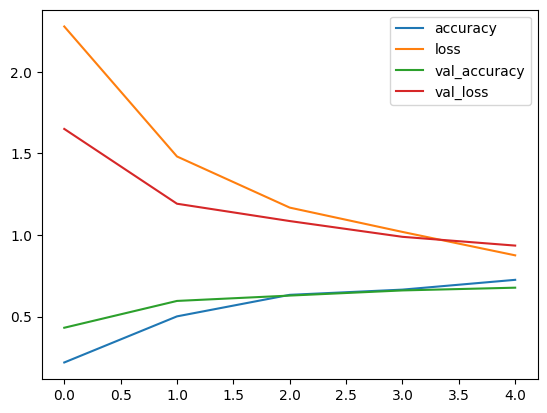

In [12]:
pd.DataFrame(hist.history).plot()

##Fine tuning model

In [13]:
for layers in base.layers[-5:]:
  layers.trainable = True

In [14]:
base_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics =['accuracy'])

In [15]:
hist =base_model.fit(train_data,
               epochs = 10,
               validation_data = test_data,
               initial_epoch = 5)

Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 753ms/step - accuracy: 0.6789 - loss: 0.9958 - val_accuracy: 0.5676 - val_loss: 1.6545
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 592ms/step - accuracy: 0.7946 - loss: 0.5865 - val_accuracy: 0.6388 - val_loss: 1.3596
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 606ms/step - accuracy: 0.8916 - loss: 0.3855 - val_accuracy: 0.6504 - val_loss: 1.3007
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 645ms/step - accuracy: 0.9166 - loss: 0.3117 - val_accuracy: 0.6888 - val_loss: 1.1062
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 585ms/step - accuracy: 0.9215 - loss: 0.2682 - val_accuracy: 0.6820 - val_loss: 1.2048


<Axes: >

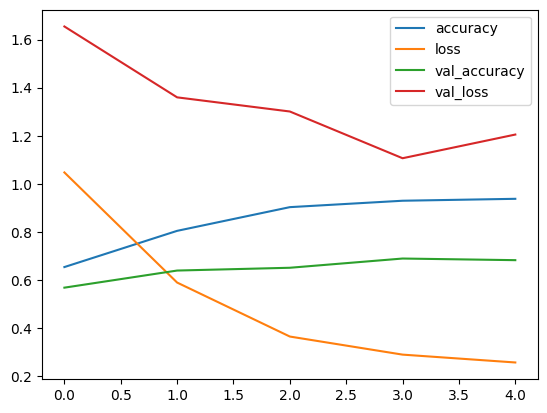

In [16]:
pd.DataFrame(hist.history).plot()

## Model Trained for 10 epochs

In [18]:
base_2 = tf.keras.applications.ResNet50(include_top=False)
base_2.trainable = False

In [22]:
inputs = tf.keras.layers.Input(shape = (224,224,3))
x= data_augment(inputs)
x = base_2(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation = "softmax")(x)
model_2= tf.keras.Model(inputs,outputs)

In [23]:
for layers in base_2.layers[-5:]:
  layers.trainable = True

In [24]:
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics =['accuracy'])

In [25]:
hist =model_2.fit(train_data,
               epochs = 10,
               validation_data = test_data)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 669ms/step - accuracy: 0.3252 - loss: 2.1293 - val_accuracy: 0.5524 - val_loss: 1.7044
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 564ms/step - accuracy: 0.7279 - loss: 0.8038 - val_accuracy: 0.6448 - val_loss: 1.3111
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 588ms/step - accuracy: 0.7894 - loss: 0.6293 - val_accuracy: 0.6660 - val_loss: 1.1922
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 548ms/step - accuracy: 0.8534 - loss: 0.4591 - val_accuracy: 0.6684 - val_loss: 1.1704
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 553ms/step - accuracy: 0.9092 - loss: 0.3268 - val_accuracy: 0.6736 - val_loss: 1.1380
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 555ms/step - accuracy: 0.9169 - loss: 0.2992 - val_accuracy: 0.6468 - val_loss: 1.2438
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 579ms/step - accuracy: 0.9425 - loss: 0.2428 - val_accuracy: 0.6708 - val_loss: 1.2114
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 586ms/step - accuracy: 0.9502 - loss: 0.2242 - val_accu

<Axes: >

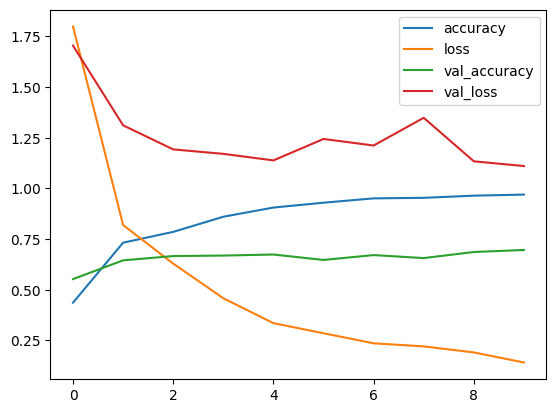

In [26]:
pd.DataFrame(hist.history).plot()

## Testing mix precision

In [27]:
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

In [28]:
base_model.load_weights("/content/model_chck.weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [29]:
base_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics =['accuracy'])

In [30]:
hist =base_model.fit(train_data,
               epochs = 10,
               validation_data = test_data,
               initial_epoch = 5)

Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 643ms/step - accuracy: 0.6572 - loss: 1.0306 - val_accuracy: 0.6264 - val_loss: 1.3369
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 581ms/step - accuracy: 0.8300 - loss: 0.5296 - val_accuracy: 0.6616 - val_loss: 1.2307
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 568ms/step - accuracy: 0.8876 - loss: 0.3915 - val_accuracy: 0.6576 - val_loss: 1.2553
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 590ms/step - accuracy: 0.9460 - loss: 0.2818 - val_accuracy: 0.6772 - val_loss: 1.2093
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 587ms/step - accuracy: 0.9441 - loss: 0.2410 - val_accuracy: 0.6976 - val_loss: 1.1236
